In [1]:
import pandas as pd
import datetime
df = pd.read_csv('All_Shark_Data.csv', parse_dates=['Date'])
analytics = pd.read_csv('AllSharkAnalytical.csv')
two_cols = pd.read_csv('All_Shark_Data_2NewCols.csv')
df.rename(columns={'Eat_Total ': 'Eat_Total'}, inplace=True)
df.head(10)

,Unnamed: 0,Date,Eat_Ross,Eat_Chandler,Eat_BT1,Eat_BT2,Eat_BT3,Eat_BT4,Eat_BT5,Eat_GR1,...,Garlic,Salmon,Bonito,Bluefish,Mahi,Goggle Eye,Humbolt Squid,BT/SB Location (1-6),GR Location (1-6),food_combo
0,0,2017-12-05,0.0,5.0,3.0,6.0,5.0,4.0,4.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,Saury
1,1,2017-12-07,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,Blue Runner_Squid_Mackerel
2,2,2017-12-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,Herring
3,3,2017-12-10,5.0,1.0,1.0,3.0,2.0,2.0,0.0,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,Mackerel
4,4,2017-12-12,2.0,2.0,0.0,5.0,2.0,4.0,5.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,Saury
5,5,2017-12-14,9.0,0.0,1.0,1.0,0.0,4.0,2.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,Blue Runner_Squid
6,6,2017-12-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2.0,Herring
7,7,2017-12-17,1.0,1.0,1.0,3.0,1.0,2.0,2.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,Mackerel
8,8,2017-12-19,2.0,3.0,5.0,2.0,3.0,0.0,3.0,5.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,Saury
9,9,2017-12-21,4.0,2.0,0.0,0.0,2.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,Blue Runner


In [60]:
min(df.Date)

Timestamp('2017-03-22 00:00:00')

In [99]:
df2019 = df[(df.Date >= '2019-05-30') & (df.Date < '2020-01-01')]
df2019.head()



,Unnamed: 0,Date,Eat_Ross,Eat_Chandler,Eat_BT1,Eat_BT2,Eat_BT3,Eat_BT4,Eat_BT5,Eat_GR1,...,Mazuri Vitamins,Garlic,Salmon,Bonito,Bluefish,Mahi,Goggle Eye,Humbolt Squid,BT/SB Location (1-6),GR Location (1-6)
177,177,2019-09-16,1.0,6.0,0.0,3.0,1.0,0.0,2.0,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,NaN
201,201,2019-10-28,3.0,4.0,1.0,4.0,2.0,2.0,1.0,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
209,209,2019-11-11,3.0,4.0,0.0,3.0,0.0,3.0,1.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,NaN


In [64]:
df.at[60, 'Date'] = datetime.datetime.strptime('2018-03-22', "%Y-%m-%d")

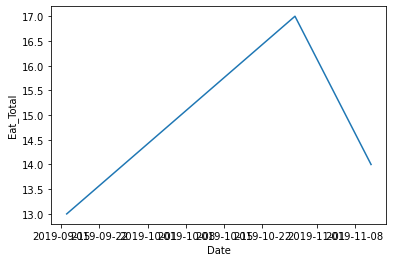

In [94]:
import seaborn as sns
ax = sns.lineplot(x=df2019.Date, y=df2019.Eat_Total, data=df2019)

In [20]:
# consolidate food combos into single column
food_combo = []
foods = ['Saury', 'Blue Runner', 'Squid', 'Mackerel', 'Herring', 'Sardine',
         'Salmon', 'Bonito', 'Bluefish', 'Mahi', 'Goggle Eye', 'Humbolt Squid']

for index, row in df.iterrows():
    food = ''
    
    for item in foods:
        if row[item] == 1:
            food += item + '_'
    # get rid of extra _
    food = food[0:(len(food)-1)]
            
    food_combo.append(food)

df['food_combo'] = food_combo

food_combos = df[['food_combo', 'Salmon']].groupby(['food_combo']).count().reset_index().rename(columns={'Salmon':'counts'})
food_combos = food_combos.sort_values(by=['counts'], ascending=False).reset_index().drop(columns=['index'])
food_combos

,food_combo,counts
0,Mackerel,144
1,Herring,122
2,Saury,119
3,Blue Runner_Squid,77
4,Saury_Salmon,28
5,Blue Runner,22
6,,11
7,Blue Runner_Squid_Salmon,9
8,Blue Runner_Squid_Mahi,6
9,Blue Runner_Squid_Bonito,6


In [2]:
food_combos = df[['food_combo', 'Salmon']].groupby(['food_combo']).count().reset_index().rename(columns={'Salmon':'counts'})
food_combos = food_combos.sort_values(by=['counts'], ascending=False).reset_index().drop(columns=['index'])
food_combos

,food_combo,counts
0,Mackerel,144
1,Herring,122
2,Saury,119
3,Blue Runner_Squid,77
4,Saury_Salmon,28
5,Blue Runner,22
6,Blue Runner_Squid_Salmon,9
7,Blue Runner_Squid_Mahi,6
8,Blue Runner_Squid_Bonito,6
9,Squid_Herring,5


In [21]:
df.to_csv('./All_Shark_Data.csv')

In [8]:
analytics
for col in analytics.columns:
    print(col)

Unnamed: 0
Date
Eat_Total
AvgPiecesPerShark
Drop_Total
AvgDropsPerShark
Target_Total
AvgTargetsPerShark
SharkCount
Temperature
Temperature_Rounded
Saury
Blue Runner
Squid
Mackerel
Herring
Sardine
Mazuri Vitamins
Garlic
Salmon
Bonito
Bluefish
Mahi
Goggle Eye
Humbolt Squid
food_combo


In [7]:
for col in two_cols.columns:
    print(col)

Unnamed: 0
Date
Week_Day
Eat_Ross
Eat_Chandler
Eat_BT1
Eat_BT2
Eat_BT3
Eat_BT4
Eat_BT5
Eat_GR1
Eat_GR2
Eat_GR3
Eat_GR4
Eat_GR5
Eat_Total
SharkCount
AvgPiecesPerShark
Drop_Ross
Drop_Chandler
Drop_BT1
Drop_BT2
Drop_BT3
Drop_BT4
Drop_BT5
Drop_GR1
Drop_GR2
Drop_GR3
Drop_GR4
Drop_GR5
Drop_Total
AvgDropsPerShark
Target_Ross
Target_Chandler
Target_BT1
Target_BT2
Target_BT3
Target_BT4
Target_BT5
Target_GR1
Target_GR2
Target_GR3
Target_GR4
Target_GR5
Target_Total
AvgTargetsPerShark
Temperature
Temperature_Rounded
Saury
Blue Runner
Squid
Mackerel
Herring
Sardine
Mazuri Vitamins
Garlic
Salmon
Bonito
Bluefish
Mahi
Goggle Eye
Humbolt Squid
BT/SB Location (1-6)
GR Location (1-6)
food_combo
Unnamed: 65
Unnamed: 66
Unnamed: 67
Unnamed: 68
Unnamed: 69
Unnamed: 70
Unnamed: 71


In [9]:
eats = df[['food_combo', 'Eat_Total']].groupby(['food_combo']).sum().reset_index()
counts = df[['food_combo', 'Eat_Total']].groupby(['food_combo']).count().reset_index().rename(columns={'Eat_Total':'counts'})
targets = df[['food_combo', 'Target_Total']].groupby(['food_combo']).sum().reset_index()
drops = df[['food_combo', 'Drop_Total']].groupby(['food_combo']).sum().reset_index()
garlic = df[['food_combo', 'Garlic']].groupby(['food_combo']).sum().reset_index()
vitamins = df[['food_combo', 'Mazuri Vitamins']].groupby(['food_combo']).sum().reset_index()
# eats = eats.sort_values(by=['Eat_Total'], ascending=False).reset_index().drop(columns=['index'])

counts['target_total'] = targets.Target_Total
counts['eat_totals'] = eats.Eat_Total 
counts['drop_totals'] = drops.Drop_Total
counts['total_garlic'] = garlic.Garlic
counts['total_vitamins'] = vitamins['Mazuri Vitamins']
# counts['total_target_eat_drop'] = counts.target_total + counts.eat_totals + counts.drop_totals
counts['eat_pct'] = round(counts.eat_totals / counts.counts, 1)
counts = counts.sort_values(by=['counts'], ascending=False).reset_index().drop(columns=['index'])
counts

,food_combo,counts,target_total,eat_totals,drop_totals,total_garlic,total_vitamins,eat_pct
0,Mackerel,144,8620,2755,465,108.0,4.0,19.1
1,Herring,122,3231,1415,153,33.0,3.0,11.6
2,Saury,119,7898,3180,462,103.0,93.0,26.7
3,Blue Runner_Squid,77,5538,2100,435,67.0,64.0,27.3
4,Saury_Salmon,28,1527,741,93,25.0,23.0,26.5
5,Blue Runner,22,1403,475,121,16.0,13.0,21.6
6,Blue Runner_Squid_Salmon,9,610,256,44,9.0,9.0,28.4
7,Blue Runner_Squid_Mahi,6,438,166,34,6.0,6.0,27.7
8,Blue Runner_Squid_Bonito,6,448,160,28,5.0,5.0,26.7
9,Squid_Herring,5,236,83,4,2.0,1.0,16.6
